# Panel 2

### Packages

In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
col1 = plt.cm.twilight(0.2)
col2 = plt.cm.twilight(0.65)
#
figpath = "data/plot/paper/panel_2/"
figsubpathstr = ['evolving_grid_rw', 'lattices', 'eigV', 'Squared', 'Triangular']
paths = {str: f"{figpath}{str}/" for str in figsubpathstr}
_ = [os.makedirs(path, exist_ok=True) for path in paths.values()]

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


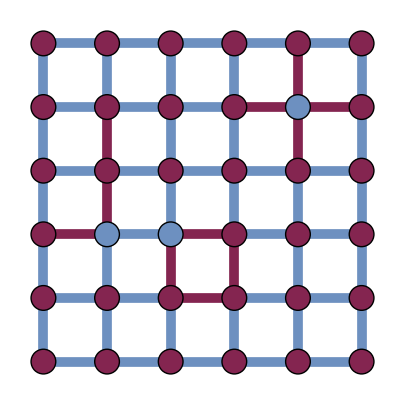

In [2]:
lattice = Lattice2D(6, pbc=False)
merged_dict = {**lattice.neg_weights_dict.get_neg_weights_dict_h_cross(10), 
               **lattice.neg_weights_dict.get_neg_weights_dict_h_square(20), 
               **{(7, 13): -1, (13, 19): -1, (18, 19): -1}, }
lattice.flip_sel_edges(merged_dict)
lattice.compute_k_eigvV()
numbers = set()
for key in merged_dict.keys():
    numbers.update(key)
G = lattice.G
G_edges_ww = G.edges(data='weight')
edgecol = [col1 if e[2] > 0 else col2 for e in G_edges_ww]
rotated_pos = {node: (y, -x) for (x, y), node in zip(lattice.posG.values(), G.nodes())}
nodecol = [col1 if i < 0 else col2 for i in lattice.eigV[0]]
# nodecol = 'w'
fig, ax = plt.subplots(figsize=(5, 5))
# Draw the graph with sketchy style for negative edges
nx.draw(G, 
            pos=rotated_pos, 
            ax=ax,  
            width=7,
            edge_color=edgecol,  
            node_size=10**2.5, 
            with_labels=False,  
            node_color=nodecol,  
            edgecolors='black')  

ax.set_aspect('equal')


### Fig. a (signed rw)
- distribuzione del tempo di cambio di segno
- zona di Brillouin

In [3]:
seed = 0xC1A0BE11F % 0xFFFFF
for p in [0.001, 0.01, 0.1]:
    n_steps = int(10**4)
    fppath = f"{paths['evolving_grid_rw']}nst={n_steps}_p={p:.3g}_seed={seed}.pdf"
    if os.path.exists(fppath):
        continue
    fig, ax = plt.subplots(figsize=(8,8))
    # plot_evolving_grid_rw(n_steps=n_steps, p = p, ax=ax, seed=seed, col1=col1, col2=col2)
    plot_evolving_grid_rw(n_steps=n_steps, p = p, ax=ax, seed=seed, col1=col2, col2=col1, init = 'fixed')
    # plot_evolving_grid_rw(n_steps=n_steps, p = p, ax=ax, seed=seed+1, col1=col1, col2=col2)

    ax.set_aspect('equal')
    set_ax_ratio_1_withlim(ax)
    ax.set_axis_off()

    # radius = 0.5  # Circle's radius as defined in ax.transAxes coordinates
    # circle_center = (0.5, 0.5)  # Circle's center in ax.transAxes coordinates
    # # Adding the circle to the figure with the specified radius and center
    # circle = Circle(circle_center, radius, lw=8, color='k', fill=False, transform=fig.transFigure, zorder=1)
    # fig.patches.append(circle)
    # # Text parameters
    # theta = 7/4 * np.pi  # Angle in radians for text placement
    # # Convert angle to degrees for text rotation, aligning text tangentially
    # angle_degrees = np.degrees(theta)
    # rotation = angle_degrees + 90
    # # Calculate text position using the circle's radius, placing text on the circumference
    # x_text = circle_center[0] + radius * np.cos(theta)
    # y_text = circle_center[1] + radius * np.sin(theta)
    # # Adding the text with specified properties, ensuring it's aligned with the circle's edge
    # fig.text(x_text, y_text, fr"$p={p:.3g}$", fontsize=42, ha='center', va='center',
    #         rotation=rotation, rotation_mode='anchor',
    #         bbox=dict(facecolor='white', alpha=1, edgecolor='none', boxstyle='round,pad=0.3'),
    #         transform=fig.transFigure, zorder=2)

    fig.tight_layout()
    fig.savefig(fppath, bbox_inches='tight')
    plt.close('all')

### Fig. b (eigV)

In [4]:
side = 512
plist = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.051, 0.103, 0.12, 0.206, 0.412]

In [5]:
arr_list = []
for pfl in plist:
    filep = f"{paths['lattices']}N={side}_p={pfl:.3g}.npy"
    if os.path.exists(filep):
        arr = np.load(filep)
    else:
        opts = dict(side1 = side, geometry = 'squared', pflip = pfl)
        lattice = Lattice2D(**opts)
        lattice.flip_random_fract_edges()
        lattice.compute_k_eigvV()
        arr = lattice.eigV[0].reshape(lattice.syshape)
        np.save(filep, arr)
    arr_list.append(arr)

In [6]:
for idx in range(len(plist)):
    fppath = f"{paths['eigV']}/_N={side}_p={plist[idx]:.3g}.pdf"
    if os.path.exists(fppath):
        continue
    fig, ax = plt.subplots(figsize=(8, 8))
    cmap = create_custom_colormap(c1=col1, c2=col2)
    im = ax.imshow(np.sign(arr_list[idx]), cmap=cmap)
    ax.axis('off')
    # fig.colorbar(im)
    fig.tight_layout()
    fig.savefig(fppath, bbox_inches='tight')
    plt.close('all')

### Fig. c

/tmp/ipykernel_6170/2686803223.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap(custom_cmap, len(L))


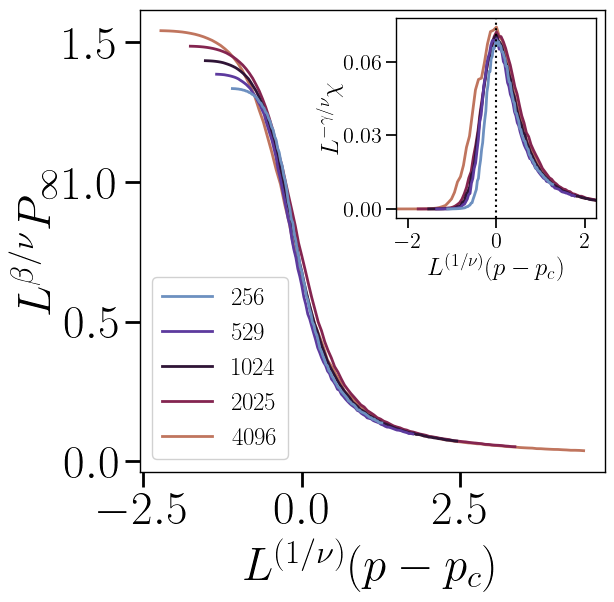

In [21]:
L = [16,23,32,45,64]
#
fig, ax = plt.subplots(figsize=(6, 6))

axins = inset_axes(ax, width=2, height=2)
#
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8, len(L)))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
cmap =cm.get_cmap(custom_cmap, len(L))
pal = list(cmap_val)# [cmap(i) for i in range(len(L))]

axvline_kwarg = dict(ls=':', color='k')
xlabelinset_kwargs = dict(labelpad=0, fontsize=18)
ylabelinset_kwargs = dict(rotation=90, labelpad=10, va="center",fontsize=18)
axins_tickparams_kwargs = dict(axis='both', which='major', size=7, width=1.25, labelsize=16)
axlegend_kwargs = dict(ncol=1, loc='lower left', fontsize=18)

for cont, N in enumerate(L):
    perc = pd.read_csv(f"{paths['Squared']}OrderP_L{N}",
                       sep=',', header=None)
    c0 = pal.pop(0)
    rc = perc[5][np.where(perc[3]==np.max(perc[3]))[0][0]]
    pinf, = ax.plot(((N)**(3/4))*(perc[5]-rc),((N)**(15/144))*gaussian_filter(perc[1],sigma=0),
            label=str(N*N), zorder=-cont,color=c0,lw=2)
    chiplot, = axins.plot((N**(3/4))*(perc[5]-rc),(N**(-129/72))*gaussian_filter(perc[3]*N*N,sigma=0),
                          lw=2,zorder=-cont,color=c0)
axins.axvline(0, **axvline_kwarg)

ax.set_xlabel(r'$L^{(1/\nu)}(p-p_c)$')
ax.set_ylabel(r'$L^{\beta/\nu}P_\infty$')
axins.set_xlabel(r'$L^{(1/\nu)}(p-p_c)$', **xlabelinset_kwargs)
axins.set_ylabel(r'$L^{-\gamma/\nu}\chi$', **ylabelinset_kwargs)
axins.set_xbound([-2.25, 2.25])
axins.yaxis.set_major_locator(plt.MaxNLocator(3))
axins.tick_params(**axins_tickparams_kwargs)


ax.legend(**axlegend_kwargs)

fppath = f"{paths['Squared']}/collapse_perc.pdf"
fig.savefig(fppath, bbox_inches='tight')

/tmp/ipykernel_6170/2854703504.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =cm.get_cmap(custom_cmap, len(L))


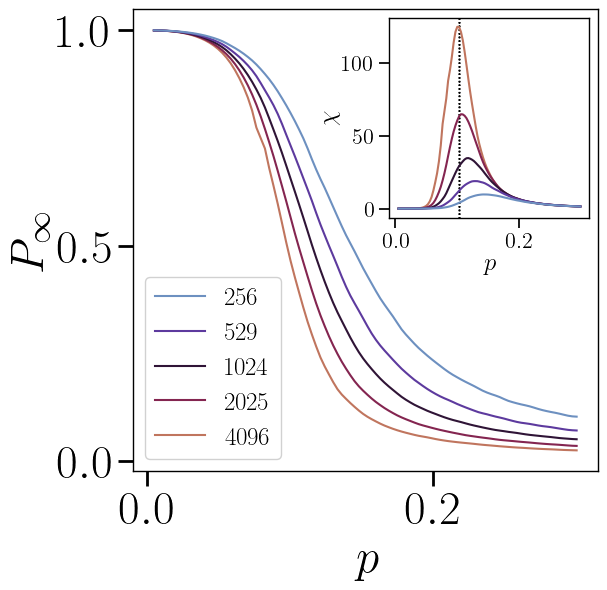

In [22]:
L = [16,23,32,45,64]
#
fig, ax = plt.subplots(figsize=(6, 6))

axins = inset_axes(ax, width=2, height=2)
#
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8, len(L)))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
cmap =cm.get_cmap(custom_cmap, len(L))
pal = list(cmap_val)# [cmap(i) for i in range(len(L))]


for cont, N in enumerate(L):
    perc = pd.read_csv(f"{paths['Squared']}OrderP_L{N}",
                       sep=',', header=None)
    c0 = pal.pop(0)
    ax.plot(perc[5],gaussian_filter(perc[1],sigma=1),label=str(N*N),
                     zorder=-cont,color=c0)
    axins.axvline(x=0.103,color='black',ls=':',lw=1,zorder=-50)
    axins.plot(perc[5],gaussian_filter(perc[3]*N*N,sigma=1),zorder=-cont,color=c0)


ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$P_\infty$')
axins.set_xlabel(r'$p$', **xlabelinset_kwargs)
axins.set_ylabel(r'$\chi$', **ylabelinset_kwargs)

axins.yaxis.set_major_locator(plt.MaxNLocator(3))
axins.tick_params(axis='both', which='major', size=7, width=1.25, labelsize=16)
ax.legend(ncol=1,loc='lower left', fontsize=18)


fppath = f"{paths['Squared']}/transition.pdf"
fig.savefig(fppath, bbox_inches='tight')

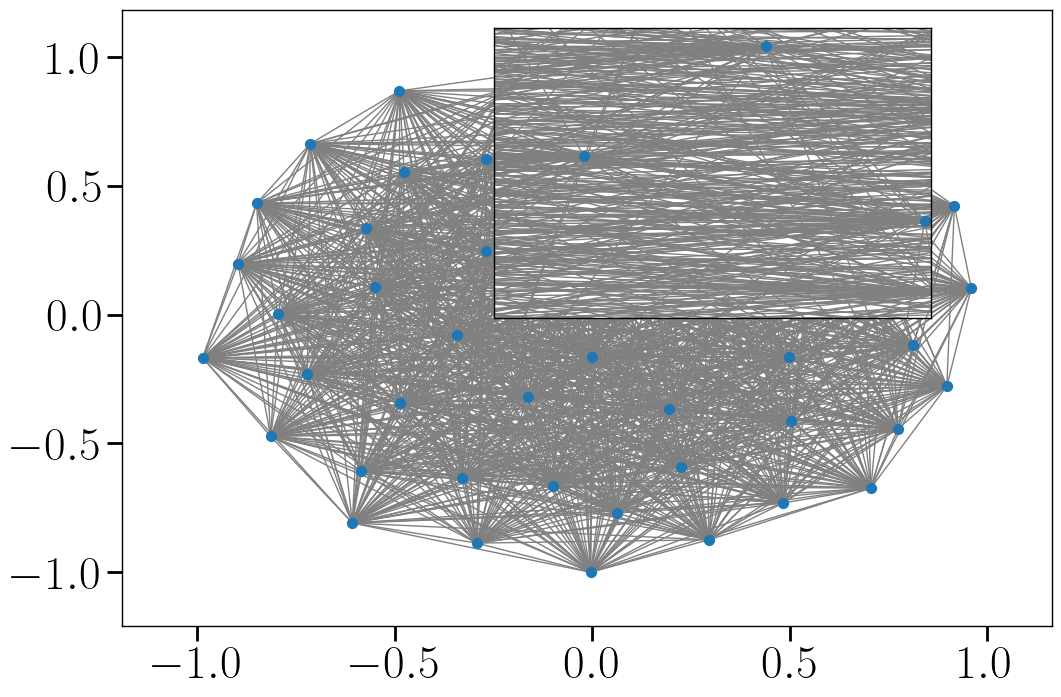

In [54]:

# Create a more complex graph for demonstration
G = nx.complete_graph(50)
pos = nx.spring_layout(G)  # Generate positions of nodes through spring layout

# Draw the main graph
fig, main_ax = plt.subplots(figsize=(12, 8))
nx.draw(G, pos, ax=main_ax, node_size=50, with_labels=False, edge_color='gray')
limits=main_ax.axis('on') # turns on axis
main_ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# Identify a subgraph to zoom into (for example, the first 5 nodes and their connections)
# nodes_of_interest = list(G.nodes())[:20]
# subgraph = G.subgraph(nodes_of_interest)
# pos_subgraph = {node: pos[node] for node in nodes_of_interest}

# Add an inset to the main plot showing a zoomed region
# The parameters for add_axes are [left, bottom, width, height], all in figure fraction
# zoom_ax = plt.axes([0.5, 0.5, 0.3, 0.3], facecolor='lightyellow')

x1, x2, y1, y2 = 0.3, 0.5, -.5, .5
zoom_ax = main_ax.inset_axes(
    [0.4, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
nx.draw(G, pos, ax=zoom_ax, node_size=50, with_labels=False, edge_color='gray')
limits=zoom_ax.axis('on') # turns on axis

# zoom_circle = Circle((0.5, 0.5), 0.5, transform=zoom_ax.transAxes, color='none', ec='black', lw=1)
# zoom_ax.add_patch(zoom_circle)
# zoom_ax.set_clip_path(zoom_circle)


plt.show()


In [4]:
avg = average_evolving_rw()

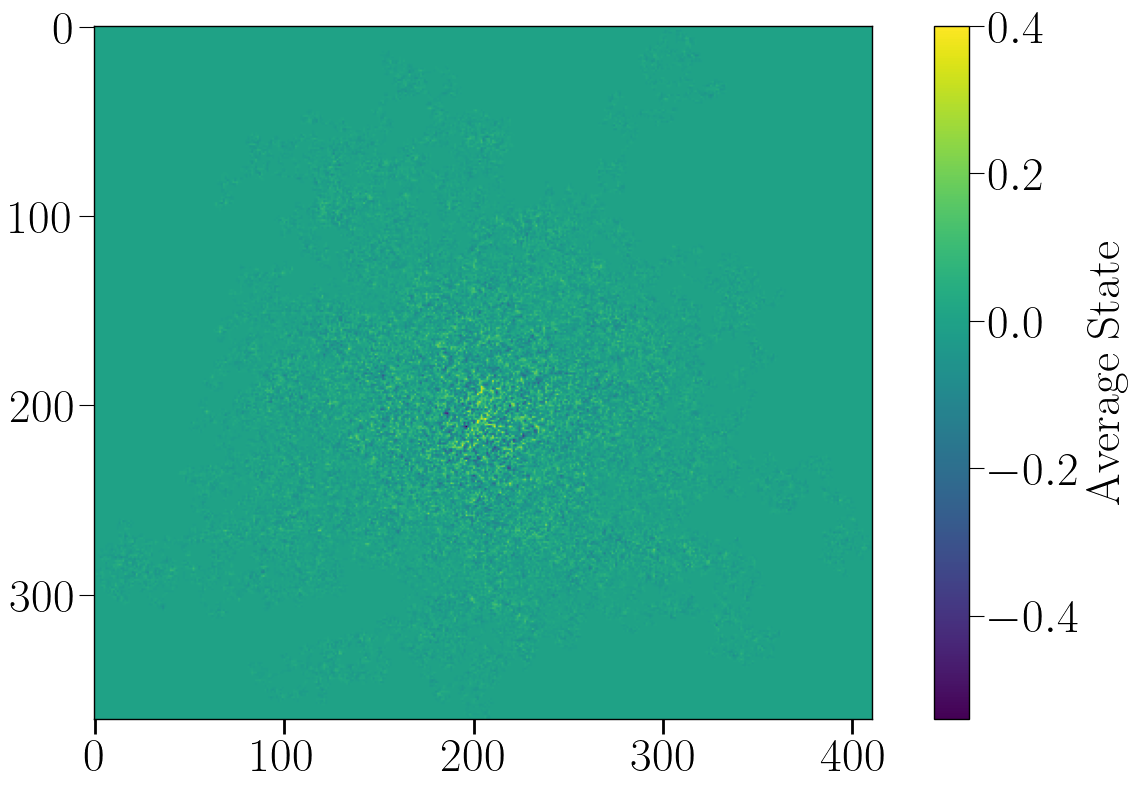

In [6]:
plt.imshow(avg)
plt.colorbar(label='Average State')

In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
figpath = "data/plot/paper/panel_2/"
figpathdat = f"{figpath}lattices/"
os.makedirs(figpathdat, exist_ok=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


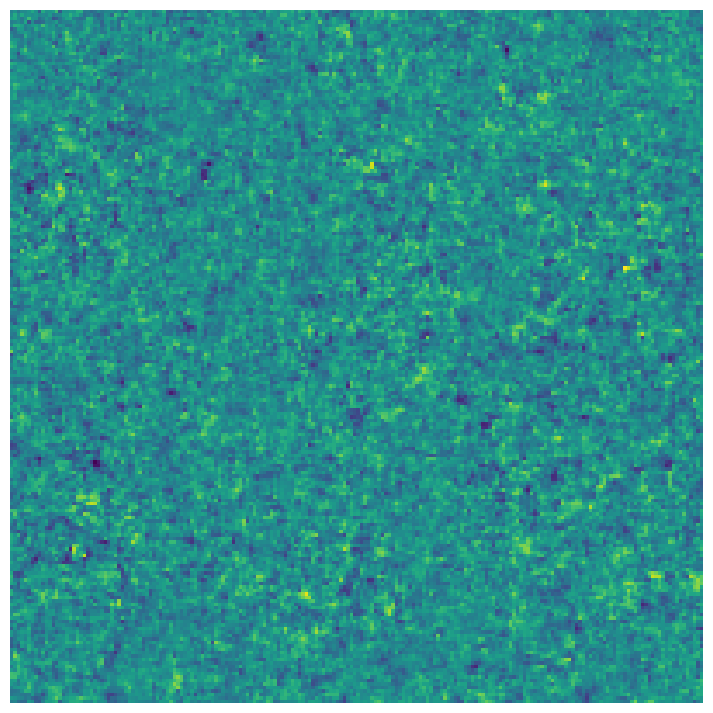

In [6]:
# Parameters
n = 200 # Grid dimensions
p = 0.1  # Probability of a negative edge
steps = n*n  # Number of steps in each random walk
N = 500  # Number of random walks

# Create the grid graph with signed edges
lattice = Lattice2D(side1=n, pflip = p)
lattice.flip_random_fract_edges()
G = lattice.G

# Perform N random walks and get the final node states
node_states = perform_random_walks(G, steps, N)
fig, ax = plt.subplots()
# Visualize the final states of nodes
visualize_node_states(node_states, n, n, ax=ax)

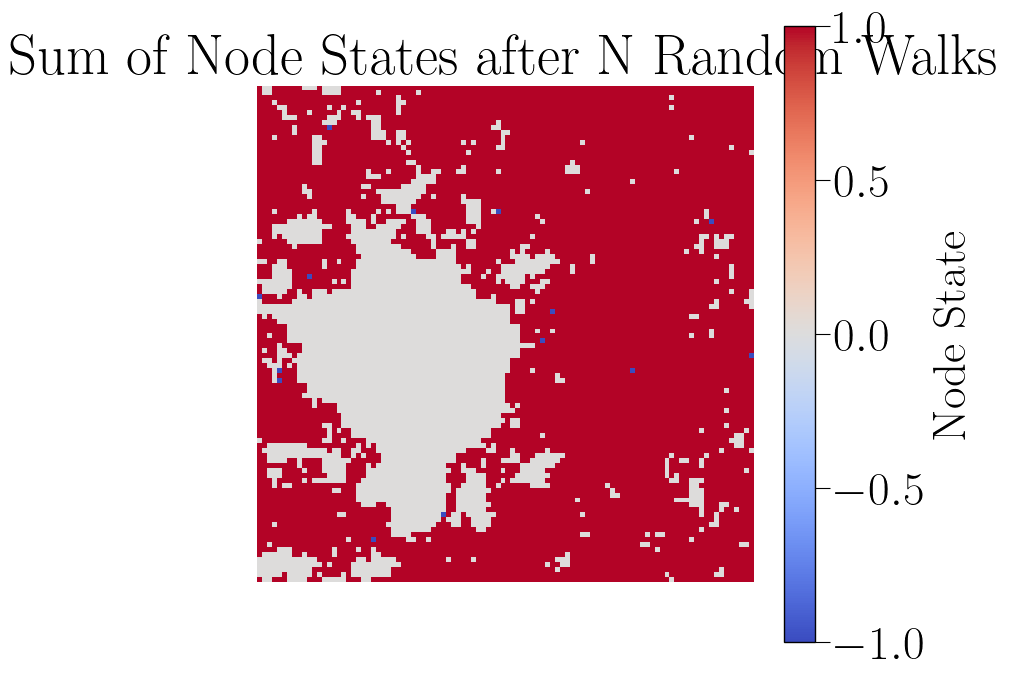

In [27]:

visualize_node_states(dict((key, np.sign(value)) for key, value in node_states.items()), n, n)


In [31]:
with open("data/l2d_squared/lrgsg/N=1024/p=0.11_na=100_.pickle", 'rb') as file:
    loaded_data = pickle.load(file)
binc, hist, bw = log_binning(loaded_data, 10)

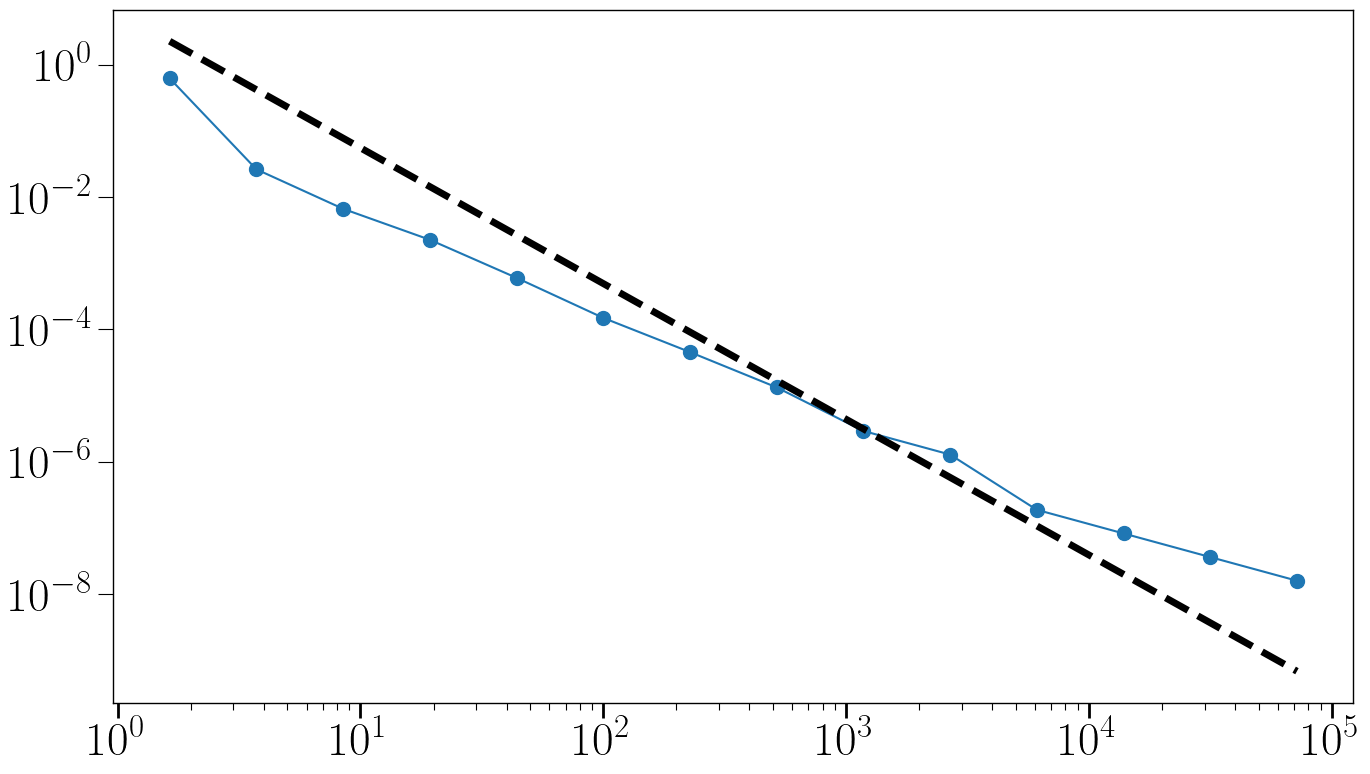

In [32]:

for i in [128]:
    with open(f"data/l2d_squared_CLUSTER/lrgsg/N={i**2}/p=0.12_na=512_.pickle", 'rb') as file:
        loaded_data = pk.load(file)
    
    b,h, bw = log_binning(loaded_data, binnum=15)
    plt.plot(b, h/(bw * h.sum()), 'o-', ms=10)
plt.plot(b, 10*(h/(bw * h.sum()))[0]*b**-2.05, lw=5, ls='--', c='k')
plt.yscale('log')
plt.xscale('log')

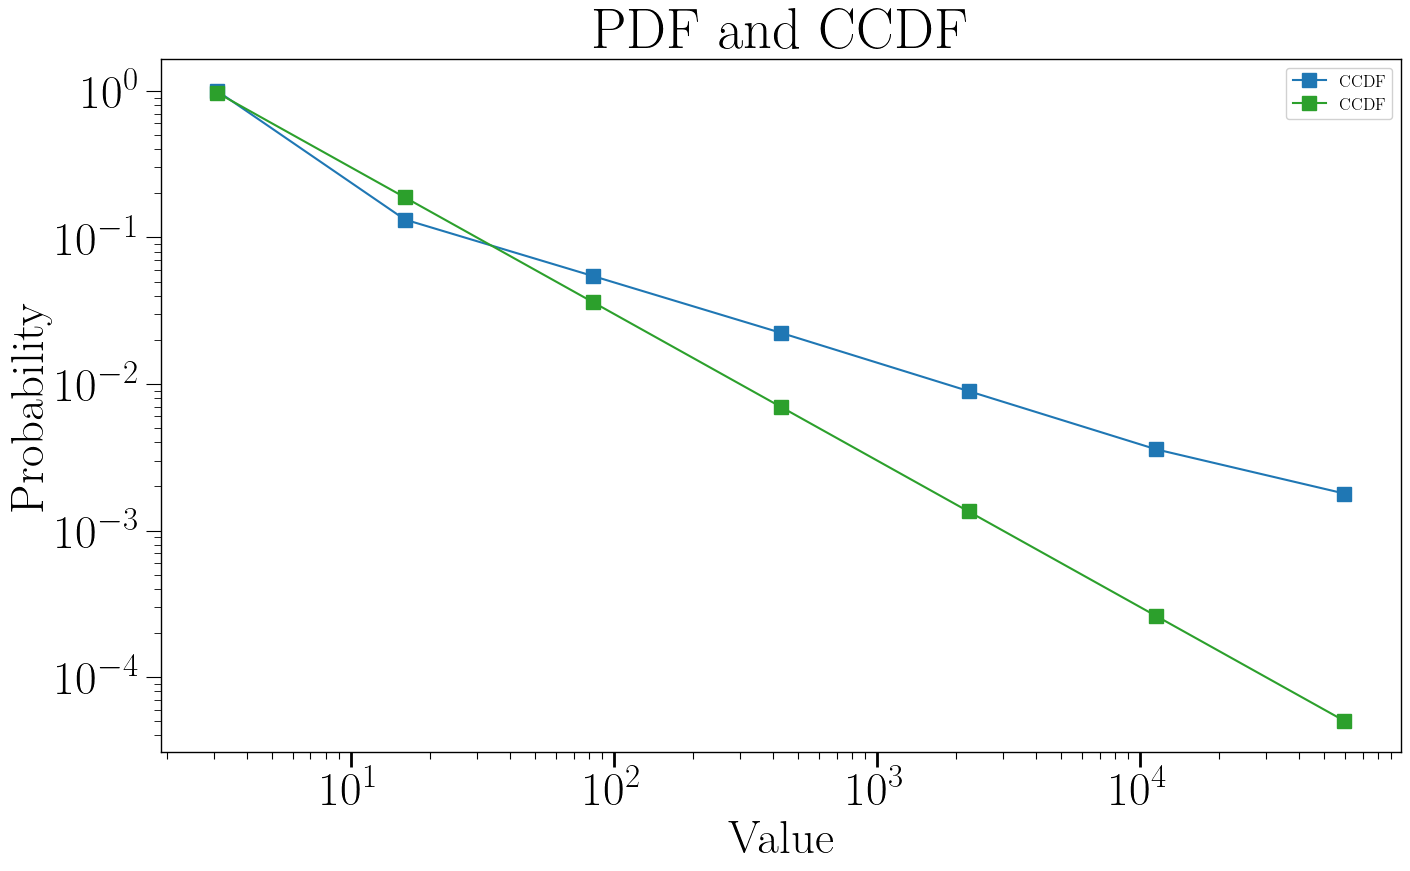

In [159]:
# Assuming log_binning function is defined and loaded_data is available
b, h, bw = log_binning(loaded_data, binnum=8)

# Calculate the CCDF
# Reverse the cumulative sum to start from the right, then normalize by the total count
ccdf = np.cumsum(h[::-1])[::-1] / h.sum()

# Plot the PDF (as you've done)
# plt.plot(b, h / (bw * h.sum()), 'o', ms=10, label='PDF')

# Plot the CCDF
plt.plot(b, ccdf, 's-', ms=10, label='CCDF')
plt.plot(b, 3*ccdf[0]*b**-1, 's-', ms=10, label='CCDF')
# Log scale for x-axis, if applicable
plt.xscale('log')

# Log scale for y-axis to better visualize CCDF on logarithmic scale
plt.yscale('log')

# Labeling
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('PDF and CCDF')
plt.legend()



In [114]:
with open(f"data/l2d_squared_CLUSTER/lrgsg/N={4096}/p=0.12_na=512_.pickle", 'rb') as file:
        loaded_data = pk.load(file)

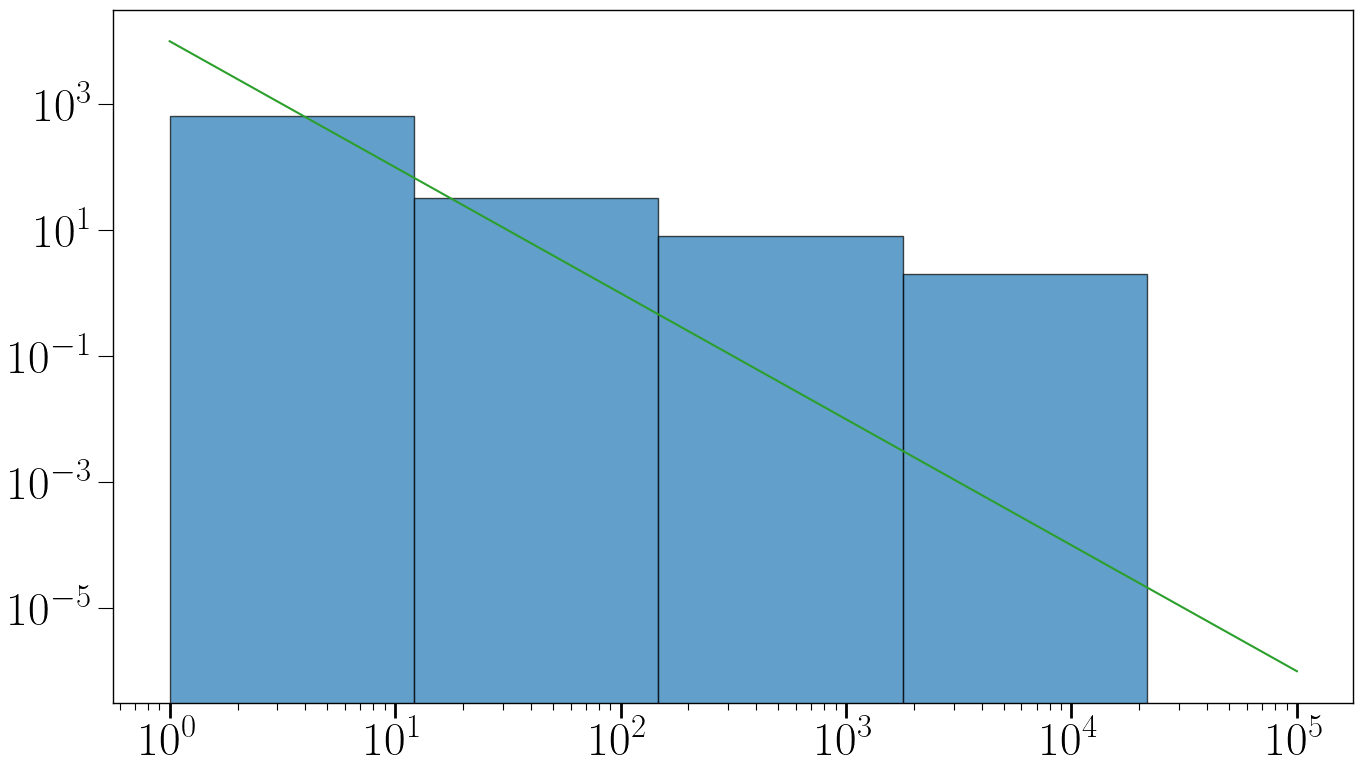

In [115]:
min_exp, max_exp = np.log10(min(loaded_data)), np.log10(max(loaded_data))
num_bins = 5  # You can adjust this based on your specific needs
bin_edges = np.logspace(min_exp, max_exp, num_bins)
plt.hist(loaded_data, bins=bin_edges, edgecolor='k', alpha=0.7)
plt.yscale('log')
plt.xscale('log')
x = np.logspace(0, 5)
plt.plot(x, 10000*x**-2)

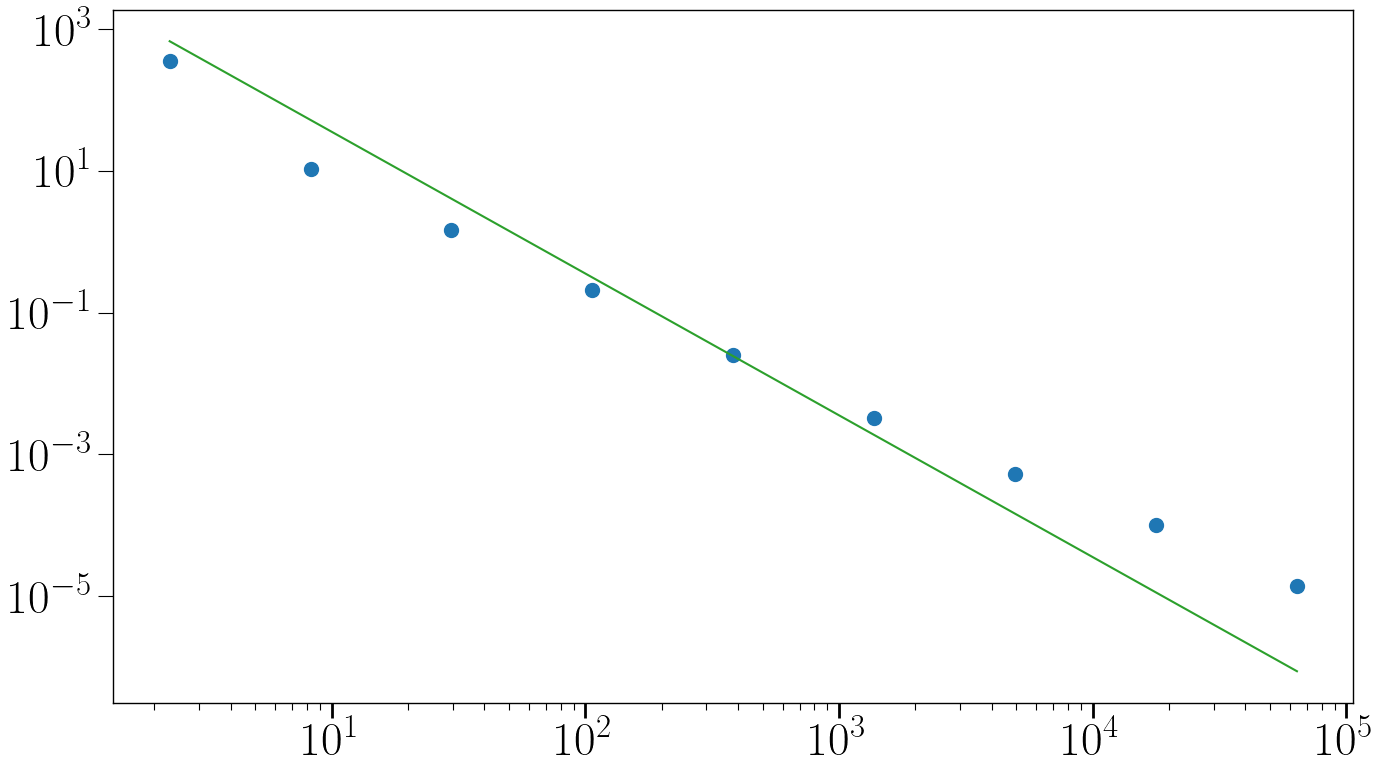

In [73]:
b,h, bw = log_binning(loaded_data, binnum=10)
plt.plot(b, h/bw, 'o', ms=10)
plt.plot(b, 10*(h/bw)[0]*b**-2)
plt.yscale('log')
plt.xscale('log')

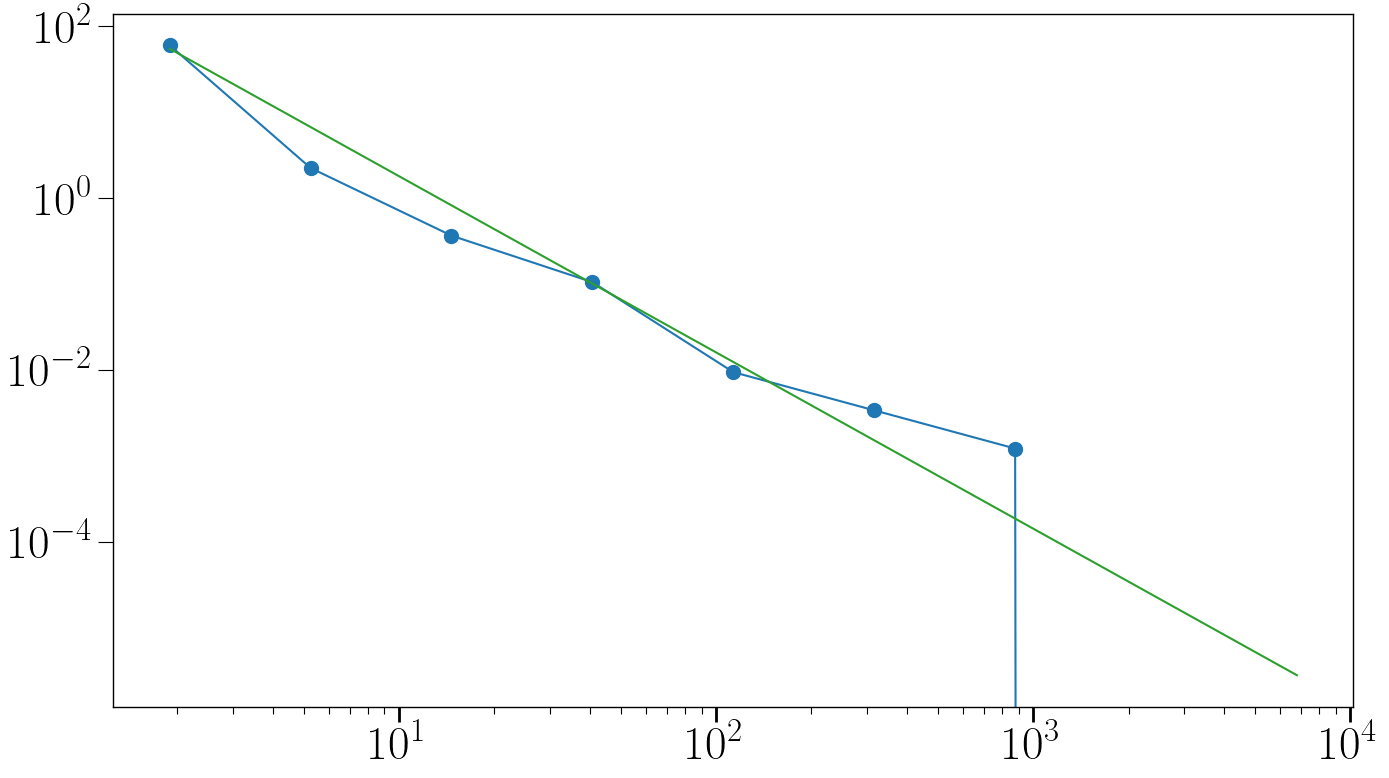

In [22]:
plt.plot(binc, hist/bw, 'o-', ms=10)
plt.plot(binc, 200*(1.0*np.array(binc))**(-2.05))
plt.yscale("log")
plt.xscale("log")

In [6]:
plt.imshow(lattice.bin_eigV().reshape(lattice.syshape))
plt.colorbar()

NameError: name 'lattice' is not defined